# **Collaborative Filtering Recommendation System**

In [4]:
from math import sqrt
import matplotlib.pyplot as plt

## **1 - Collecting Preferences**

The foundation of any recommendation system is data. For our movie recommendation system, we begin by collecting movie ratings from various critics. This data is stored in a dictionary where each key is a critic's name and each value is another dictionary of movie titles and their respective ratings.

In [2]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

## **2 - Finding Similar Users**

### **2.1 - Measuring Similarities**

To make recommendations, we need to measure how similar the users (critics) are in terms of their movie preferences. We'll explore two statistical methods: Euclidean distance and Pearson correlation.

#### **2.1.1 - Euclidean Distance Score**

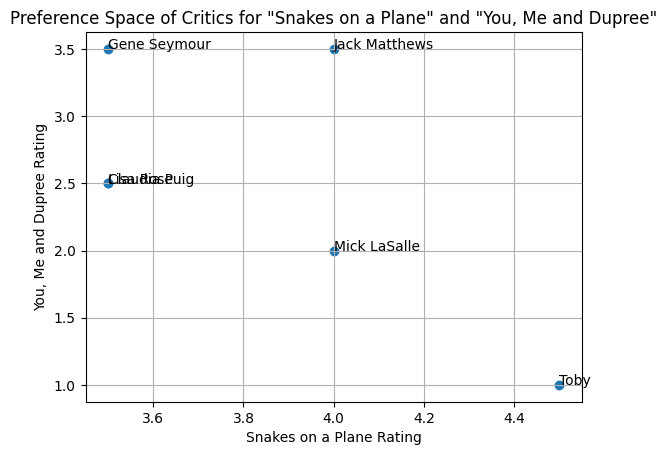

In [6]:
"""
Here is the preference space plot for the movie critics based on their ratings
for "Snakes on a Plane" and "You, Me and Dupree". Each critic is plotted according
to their rating for "Snakes on a Plane" on the x-axis and "You, Me and Dupree" on
the y-axis.

The closer two people are in the preference space, the more similar their preferences
are. Because the chart is two-dimensional, you can only look at two
rankings at a time, but the principle is the same for bigger sets of rankings.
"""

# Initialize lists to hold the x and y coordinates for the plot
x = []
y = []
names = []

# Iterate over the dictionary to extract ratings for 'Snakes on a Plane' and 'You, Me and Dupree'
for critic, ratings in critics.items():
    if 'Snakes on a Plane' in ratings and 'You, Me and Dupree' in ratings:
        x.append(ratings['Snakes on a Plane'])
        y.append(ratings['You, Me and Dupree'])
        names.append(critic)

# Creating the plot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Annotating the plot with critic names
for i, name in enumerate(names):
    ax.annotate(name, (x[i], y[i]))

# Setting plot labels and title
plt.title('Preference Space of Critics for "Snakes on a Plane" and "You, Me and Dupree"')
plt.xlabel('Snakes on a Plane Rating')
plt.ylabel('You, Me and Dupree Rating')
plt.grid(True)

# Show plot
plt.show()

In [13]:
"""
This function calculates the eucludean distance, which will be smaller for people
who are more similar. However, you need a function that gives higher
values for people who are similar. This can be done by adding 1 to the
function (so you don’t get a division-by-zero error) and inverting it.

The function always returns a value between 0 and 1, where a value
of 1 means that two people have identical preferences
"""

# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
  # Get the list of shared_items
  si={}
  for item in prefs[person1]:
    if item in prefs[person2]: si[item]=1

  # if they have no ratings in common, return 0
  if len(si)==0: return 0

  # Add up the squares of all the differences
  sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
                      for item in prefs[person1] if item in prefs[person2]])

  return 1/(1+sum_of_squares)

In [20]:
sim_distance(critics,'Lisa Rose','Claudia Puig'), sim_distance(critics,'Lisa Rose','Gene Seymour')

(0.2857142857142857, 0.14814814814814814)

#### **2.1.2 - Pearson Correlation Score**

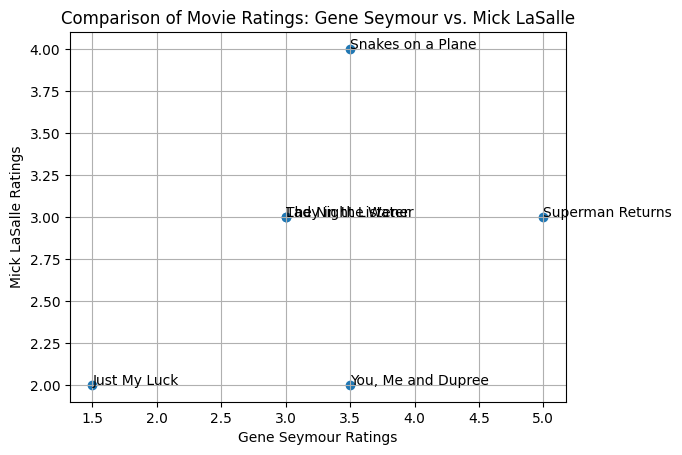

In [8]:
"""
Here is the scatter plot comparing the movie ratings of Gene Seymour and Mick LaSalle.
Each point on the plot represents a movie, plotted according to its rating by Gene Seymour
on the x-axis and by Mick LaSalle on the y-axis. The plot shows how their ratings align or
differ for each movie they both reviewed.
"""

# Initialize lists to hold the ratings and movie titles for plotting
x_gene = []
y_mick = []
movies = []

# Iterate over the dictionary to extract ratings for each movie by Gene Seymour and Mick LaSalle
for movie in critics['Gene Seymour']:
    if movie in critics['Mick LaSalle']:
        x_gene.append(critics['Gene Seymour'][movie])
        y_mick.append(critics['Mick LaSalle'][movie])
        movies.append(movie)

# Creating the plot
fig, ax = plt.subplots()
ax.scatter(x_gene, y_mick)

# Annotating the plot with movie titles
for i, movie in enumerate(movies):
    ax.annotate(movie, (x_gene[i], y_mick[i]))

# Setting plot labels and title
plt.title('Comparison of Movie Ratings: Gene Seymour vs. Mick LaSalle')
plt.xlabel('Gene Seymour Ratings')
plt.ylabel('Mick LaSalle Ratings')
plt.grid(True)

# Show plot
plt.show()


In [11]:
"""
A slightly more sophisticated way to determine the similarity between
people’s interests is to use a Pearson correlation coefficient.

This function will return a value between −1 and 1. A value of 1 means
that the two people have exactly the same ratings for every item. A value
of −1 means that the two people have exactly the opposite ratings for every
item. A value of 0 means that the two people have no ratings in common.
"""

# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
  # Get the list of mutually rated items
  si={}
  for item in prefs[p1]:
    if item in prefs[p2]: si[item]=1

  # if they are no ratings in common, return 0
  if len(si)==0: return 0

  # Sum calculations
  n=len(si)

  # Sums of all the preferences
  sum1=sum([prefs[p1][it] for it in si])
  sum2=sum([prefs[p2][it] for it in si])

  # Sums of the squares
  sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
  sum2Sq=sum([pow(prefs[p2][it],2) for it in si])

  # Sum of the products
  pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])

  # Calculate r (Pearson score)
  num=pSum-(sum1*sum2/n)
  den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
  if den==0: return 0

  r=num/den

  return r

In [21]:
sim_pearson(critics,'Lisa Rose','Claudia Puig'), sim_pearson(critics,'Lisa Rose','Gene Seymour')

(0.5669467095138396, 0.39605901719066977)

#### **2.1.3 - Which Similarity Metric Should You Use?**

I’ve introduced functions for two different metrics here, but there are actually
many more ways to measure similarity between two sets of data.

The functions in the rest of this notebook have an optional similarity parameter,
which points to a function to make it easier to experiment: specify
sim_pearson or sim_distance to choose which similarity parameter
to use. There are many other functions such as the Jaccard coefficient or
Manhattan distance that you can use as your similarity function, as long
as they have the same signature and return a float where a higher value
means more similar.

Now that you have functions for comparing two people, you can create a
function that scores everyone against a given person and finds the closest
matches.

For example, I might be interested in learning which movie critics are simliar to mine so that I know whose advice I should take when deciding
on a movie to watch.

### **2.2 - Recommanding similar users**

Once user preferences are gathered and similarities are established, recommendation algorithms can predict and suggest items. These algorithms make use of user data to provide personalized content that aligns with their preferences.

**User-Based Collaborative Filtering**

User-Based Collaborative Filtering focuses on finding similarities between users. The system assumes that if users A and B have rated items similarly in the past, they will continue to agree in the future.

For instance, if user A likes an item that user B hasn't rated yet, the system might suggest this item to user B, expecting a positive reception.

In [22]:
"""
This function uses a Python list comprehension to compare me (the parameter person refers to me) to every
other user in the dictionary using one of the previously defined distance
metrics. Then it returns the first n items of the sorted results.
"""

# Returns the best matches for person from the prefs dictionary.
# Number of results and similarity function are optional params.
def topMatches(prefs,person,n=5,similarity=sim_pearson):
  scores=[(similarity(prefs,person,other),other)
                  for other in prefs if other!=person]
  scores.sort()
  scores.reverse()
  return scores[0:n]

In [24]:
"""
Given the output [(0.9912407071619299, 'Lisa Rose'),  (0.9244734516419049, 'Mick LaSalle'),  (0.8934051474415647, 'Claudia Puig')],
I (Toby) know that I should be reading reviews by Lisa Rose, as her tastes tend to be similar to mine.
"""
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

## **3 - Recommending Items**

Finding a good critic to read is great, but what I really want is a movie
recommendation right now. I could just look at the person who has tastes
most similar to mine and look for a movie he likes that I haven’t seen yet,
but that would be too permissive. Such an approach could accidentally
turn up reviewers who haven’t reviewed some of the movies that I might
like. It could also return a reviewer who strangely liked a movie that got
bad reviews from all the other critics

To solve these issues, you need to score the items by producing a
weighted score that ranks the critics.

We will take the votes of all the other critics
and multiply how similar they are to me by the score they gave to each
movie.

In [25]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
  totals={}
  simSums={}
  for other in prefs:
    # don't compare me to myself
    if other==person: continue
    sim=similarity(prefs,person,other)

    # ignore scores of zero or lower
    if sim<=0: continue
    for item in prefs[other]:

      # only score movies I haven't seen yet
      if item not in prefs[person] or prefs[person][item]==0:
        # Similarity * Score
        totals.setdefault(item,0)
        totals[item]+=prefs[other][item]*sim
        # Sum of similarities
        simSums.setdefault(item,0)
        simSums[item]+=sim

  # Create the normalized list
  rankings=[(total/simSums[item],item) for item,total in totals.items()]

  # Return the sorted list
  rankings.sort()
  rankings.reverse()
  return rankings

Now you can find out what movies I should watch next

In [26]:
getRecommendations(critics,'Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [27]:
getRecommendations(critics,'Toby',similarity=sim_distance) # here we changed the type of similarity into Eucludean

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

Not only do you get a ranked list of movies, but you also get a guess at
what my rating for each movie would be. This report lets me decide if I
want to watch a movie at all, or if I’d rather do something else entirely.
Depending on your application, you may decide not to give a recommendation
if there’s nothing that would meet a given user’s standards.

You’ve now built a complete recommendation system, which will work
with any type of product or link. All you have to do is set up a dictionary
of people, items, and scores, and you can use this to create recommendations
for any person.

## **4 - Matching Products**

Now you know how to find similar people and recommend products for a
given person, but what if you want to see which products are similar to
each other? What if the platform hasn’t collected a lot of information about you and it's not able to find similar people to you?

Let's assume this is your first time on YouTube and you just watched only on video. All those who watched the same video are automatically similar to you, using the user-based collective filtering algorithm. It might be difficult to know whose preference should be recommand to you. In this case, we should use **Item-Based Collaborative Filtering**. That's why you can see on online platforms "Customers who watched this video A also watched the video B.

While user-based filtering considers similarities between users, item-based filtering focuses on the relationships between items themselves. This approach is particularly useful for large datasets and is often more scalable than user-based filtering.



For that, you can determine similarity by looking at who liked a particular
item and seeing the other things they liked.


This is actually the same method we used earlier to determine similarity between people—you just need to swap the people and the items. So you can use the same methods you wrote earlier if you transform the dictionary from:

{
'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},

'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}
}

to:

{
'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},

'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}
}

In [28]:
# function to do this transformation
def transformPrefs(prefs):
  result={}
  for person in prefs:
    for item in prefs[person]:
      result.setdefault(item,{})

      # Flip item and person
      result[item][person]=prefs[person][item]
  return result

In [29]:
movies = transformPrefs(critics)

now call the topMatches function used earlier to find the set of
movies most similar to the movie "Superman Returns":

In [32]:
"""
Notice that in this example there are actually some negative correlation
scores, which indicate that those who like Superman Returns tend to dislike
Just My Luck and those who like Just My Luck tend to dislike Superman Returns.
"""

topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

Finally, you can even recommend critics who might enjoy a particular movie, providing a twist on the typical use of recommendation systems.

In [33]:
getRecommendations(movies,'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

## **Conclusion**
We've covered how to build a collaborative filtering recommendation system from scratch, providing practical code examples and detailed explanations. Whether you're looking to recommend movies, books, or any other product, these techniques can be adapted to suit your needs.